# Evaluation of the deblurring results
This notebook presents the results both by showing the results and once by presenting quantitative analysis using metrics, such as PSNR and SSIM.

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import cv2

C:\Users\zsomb\AppData\Local\Temp\ipykernel_28304\565180577.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Berkley dataset

The data is the benchmark dataset called the Berkley Segmentation Dataset and Benchmark including 300 images (BSDS300) (https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/).
An autoencoder model was trained on the 200 images of the train dataset and the evaluation was done on the remaining 100 images. To blur the images a Gaussian blur was implemented with the kernel size of 15.
The results of the deblurring are shown bellow. 5 randomly picked images from the test dataset are representing the quality of the deblurring capability of the implemented autoencoder model.

In [25]:
src_dir = './test_data/sharp/berkley'
test_images = os.listdir(src_dir)
np.random.seed(123)
random_pick = np.random.choice(test_images, 5, replace=False)

In the following section, the original, the blurred and the deblurred images of 5 randomly picked images are shown from the test dataset. This helps to better interpret the quantitative results of the PSNR and SSIM metrics.

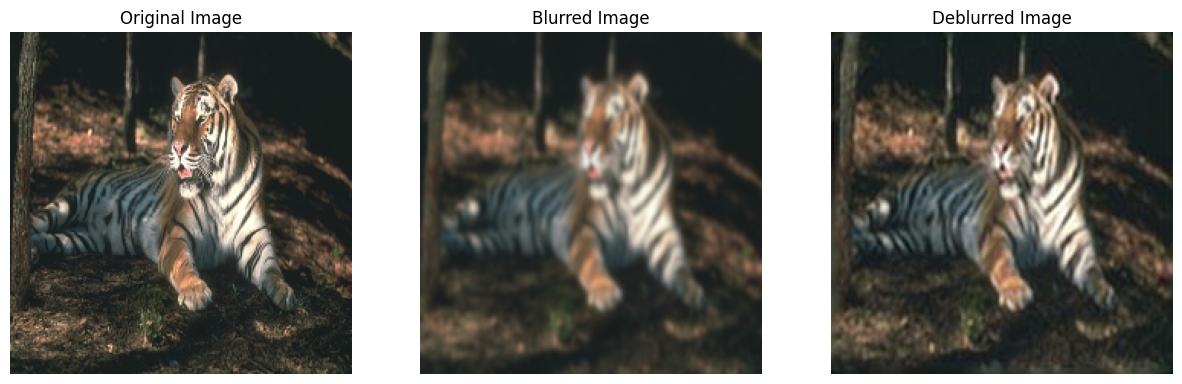

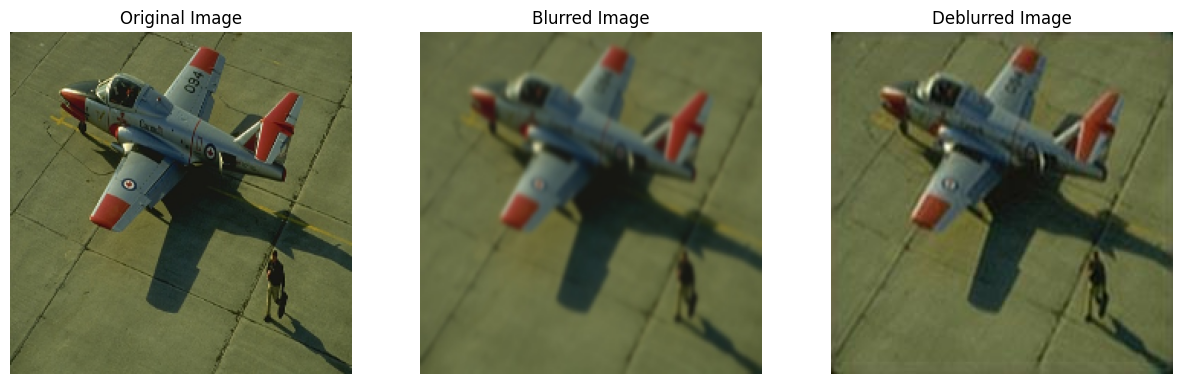

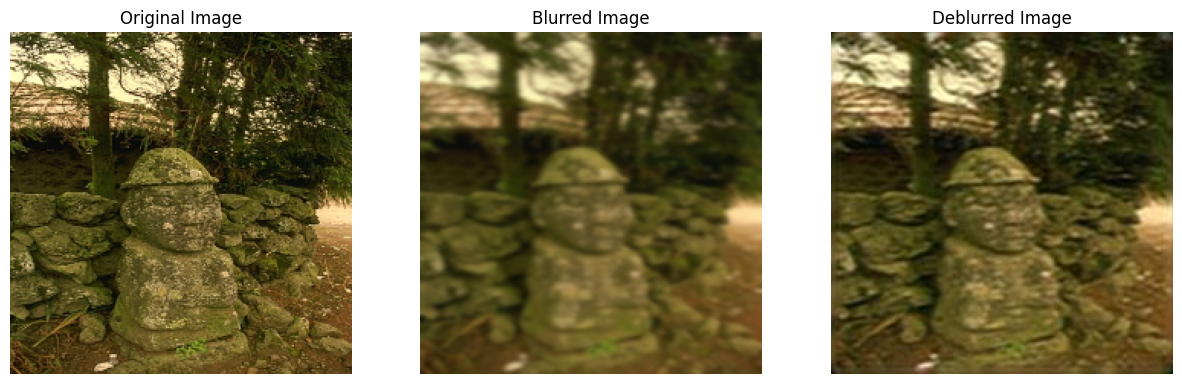

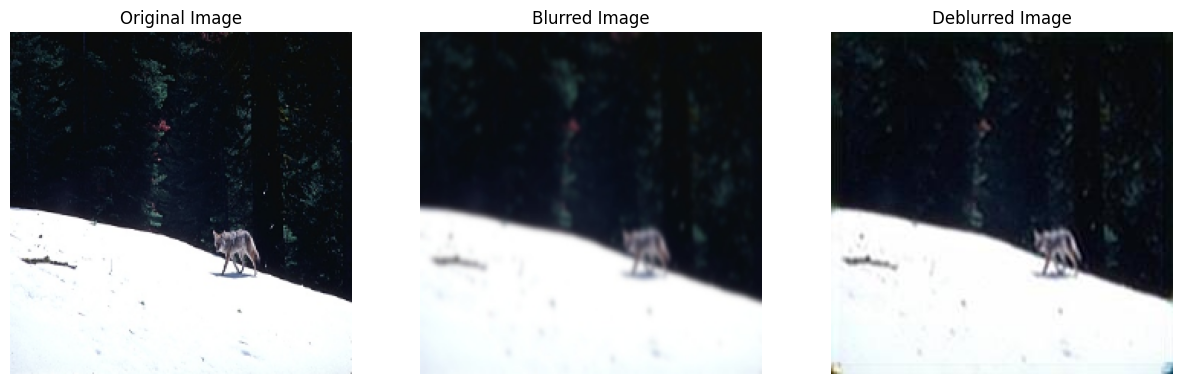

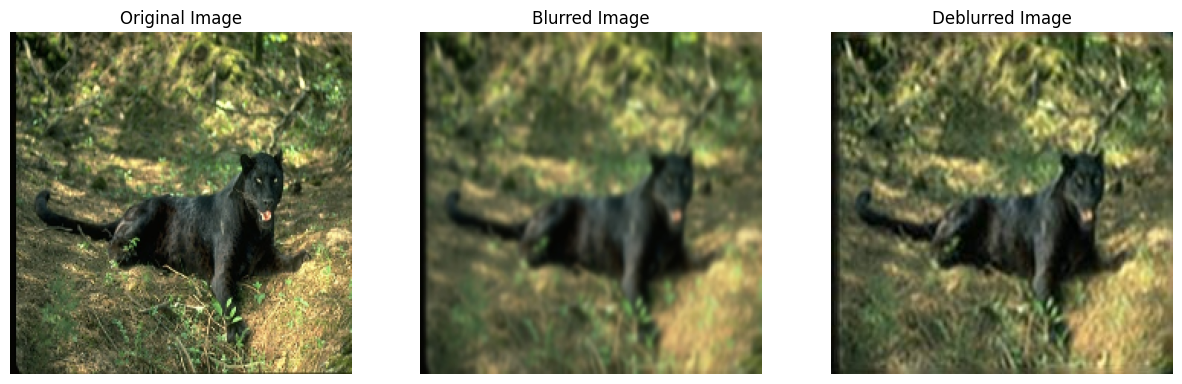

In [26]:
for image in random_pick:
    # Read images
    orig_image = plt.imread(f"./test_data/sharp/berkley/{image}")
    blur_image = plt.imread(f"./test_data/gaussian_blurred/berkley/{image}")
    deblur_image = plt.imread(f"./test_data/deblurred/berkley/deblurred_{image}")
        
    # Resize images to (224, 224)
    orig_image = cv2.resize(orig_image, (224, 224))
    blur_image = cv2.resize(blur_image, (224, 224))
    deblur_image = cv2.resize(deblur_image, (224, 224))

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(orig_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(blur_image)
    plt.title('Blurred Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(deblur_image)
    plt.title('Deblurred Image')
    plt.axis('off')

    plt.show()

The make these results measureable, the PSNR and SSIM metric were implemented.

The PSNR metric heavily relies on the MSE between the compared images. If the MSE value becomes close to zero, then the PSNR goes to infinite. To counter this issue, in the implemented function for perfect matching (meaning, that MSE is zero), the resulting PSNR value is 100.

In contrast to PSNR, the SSIM metric tries to catch the similarity of 2 images and the metric is in the range of 0 and 1. Unlike MSE or PSNR, which estimate absolute errors, SSIM focuses on the inter-dependencies of pixels, especially when they are spatially close. 

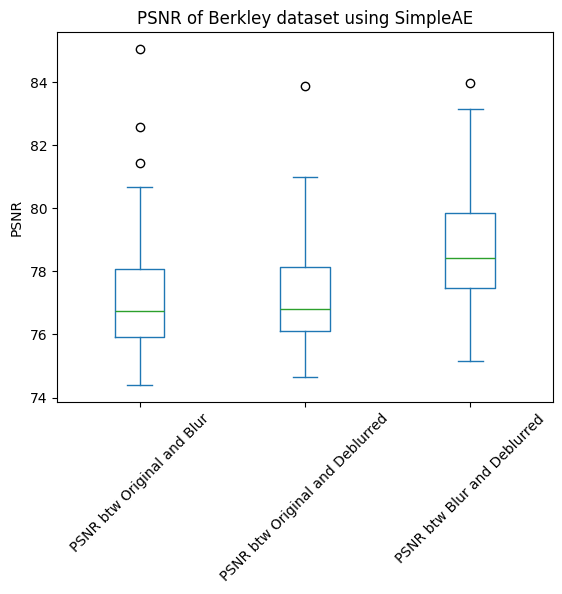

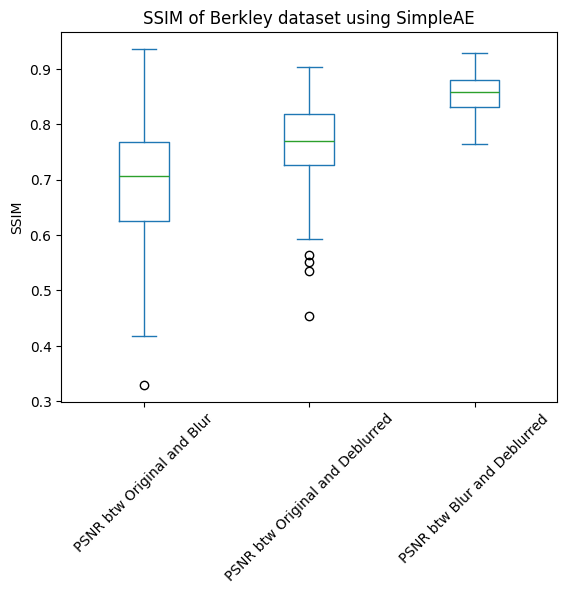

In [24]:
# Load PSNR and SSIM resutts
berkley_psnr = pd.read_csv("test_data/psnr_berkley_simpleae.csv", index_col=0)
berkley_ssim = pd.read_csv("test_data/ssim_berkley_simpleae.csv", index_col=0)

ax = berkley_psnr.plot(kind="box")
ax.set_xticklabels(rotation=45, labels=berkley_psnr.columns)
plt.title("PSNR of Berkley dataset using SimpleAE")
plt.ylabel("PSNR")
plt.show()

ax = berkley_ssim.plot(kind="box")
ax.set_xticklabels(rotation=45, labels=berkley_psnr.columns)
plt.title("SSIM of Berkley dataset using SimpleAE")
plt.ylabel("SSIM")
plt.show()